In [22]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

f = h5py.File('jetImages.h5','r')
x_train = f.get("x_train").value
x_test  = f.get("x_test").value

y_train = f.get("y_train").value
y_test  = f.get("y_test").value



/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.


In [23]:
#Best hyperparameters: {'dropout_rate': 0.1, 'kernel_size': (2, 2), 'learning_rate': 0.0001, 'num_conv_layers': 1, 'num_filters': 4, 'pool_size': (2, 2)}


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import tensorflow as tf
model_cnn = Sequential()
model_cnn.add(Conv2D(1, (2, 2), input_shape=(15, 15,1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))


model_cnn.add(Flatten())
model_cnn.add(Dense(2, activation='softmax'))

# Compile model

model_cnn.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1.0e-4), metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train, y_train, validation_split=0.2, epochs=150, 
                            batch_size=256, shuffle=True, verbose=1)
model_cnn.summary()

Epoch 1/150
283/283 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.4594 - val_loss: 0.6975 - val_accuracy: 0.4724
Epoch 2/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4951 - val_loss: 0.6901 - val_accuracy: 0.5036
Epoch 3/150
283/283 [==============================] - 1s 3ms/step - loss: 0.6866 - accuracy: 0.5191 - val_loss: 0.6844 - val_accuracy: 0.5291
Epoch 4/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.5588 - val_loss: 0.6797 - val_accuracy: 0.5746
Epoch 5/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6768 - accuracy: 0.5920 - val_loss: 0.6756 - val_accuracy: 0.5949
Epoch 6/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.6052 - val_loss: 0.6722 - val_accuracy: 0.6046
Epoch 7/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6698 - accuracy: 0.6110 - val_loss: 0.6695 - val_accuracy: 0.6100

Epoch 58/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6516 - accuracy: 0.6259 - val_loss: 0.6533 - val_accuracy: 0.6244
Epoch 59/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6515 - accuracy: 0.6259 - val_loss: 0.6532 - val_accuracy: 0.6241
Epoch 60/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6514 - accuracy: 0.6259 - val_loss: 0.6532 - val_accuracy: 0.6247
Epoch 61/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6514 - accuracy: 0.6254 - val_loss: 0.6532 - val_accuracy: 0.6244
Epoch 62/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6513 - accuracy: 0.6258 - val_loss: 0.6531 - val_accuracy: 0.6249
Epoch 63/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6258 - val_loss: 0.6531 - val_accuracy: 0.6253
Epoch 64/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6265 - val_loss: 0.6530 - val_accuracy:

Epoch 115/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6264 - val_loss: 0.6518 - val_accuracy: 0.6257
Epoch 116/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6260 - val_loss: 0.6519 - val_accuracy: 0.6258
Epoch 117/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6265 - val_loss: 0.6518 - val_accuracy: 0.6257
Epoch 118/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6265 - val_loss: 0.6518 - val_accuracy: 0.6249
Epoch 119/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6260 - val_loss: 0.6518 - val_accuracy: 0.6258
Epoch 120/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6265 - val_loss: 0.6518 - val_accuracy: 0.6254
Epoch 121/150
283/283 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6267 - val_loss: 0.6518 - val_ac

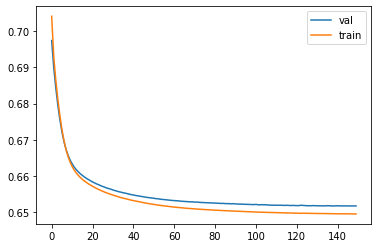

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib import pyplot as plt
plt.plot(history_cnn.history['val_loss'], label='val')
plt.plot(history_cnn.history['loss'], label='train')
plt.legend()
plt.show()
plt.savefig('history_cnn.png')

In [31]:
predictions_cnn = model_cnn.predict(x_test)
model_cnn.save('cnn.h5')

In [32]:
from sklearn.metrics import roc_curve
fpr_cnn, tpr_cnn, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())

from sklearn.metrics import auc
auc = auc(fpr_cnn, tpr_cnn)

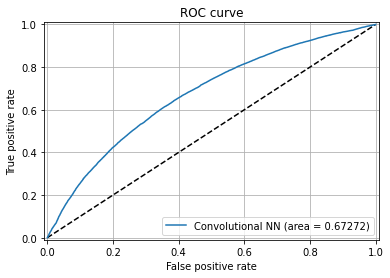

In [33]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn, tpr_cnn, label='Convolutional NN (area = {:.5f})'.format(auc))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('ROC_curve.png')

In [34]:
predictions_cnn = model_cnn.predict(x_test)

y_pred_DD_train = model_cnn.predict(x_train)
y_pred_DD_test = model_cnn.predict(x_test)

n_bins=100
hist_range=(0.0,1.0)
plt.figure(figsize=(8,9))

plt.hist(y_pred_DD_train[:,1],bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, quark")
counts,bin_edges = np.histogram(y_pred_DD_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, quark")

plt.hist(y_pred_DD_train[:,0],bins=n_bins,range=hist_range,histtype='step' , color="red",density=True,alpha=0.4,label="Train, gluon")
counts,bin_edges = np.histogram(y_pred_DD_test[:,0], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, gluon")

plt.xlabel("Prediction from CNN", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('CNN output')
plt.show()

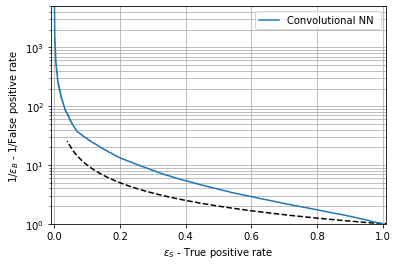

In [35]:
np.seterr(divide='ignore', invalid='ignore') # disable warning for 1/0 divisions
plt.plot(thresholds, 1/thresholds, 'k--')
plt.plot(tpr_cnn, 1/fpr_cnn, label='Convolutional NN ')
plt.gca().set(ylabel='1/$\epsilon_B$ - 1/False positive rate', xlabel='$\epsilon_S$ - True positive rate', 
              title='', xlim=(-0.01,1.01), ylim=(1,5*10**3), yscale='log')
plt.grid(True, which="both")
plt.legend();

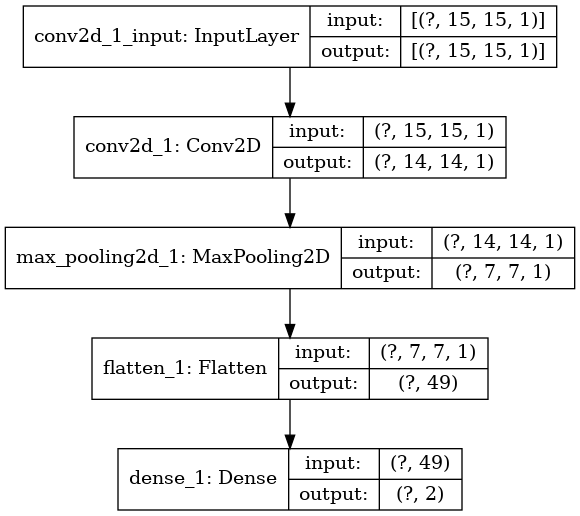

In [36]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_cnn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [37]:
import hls4ml
import os
#os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']
os.environ['PATH'] = '/tools/Xilinx/Vivado/2018.3/bin:' + os.environ['PATH']
#os.environ['PATH'] = '/tools/Xilinx/Vivado/2022.1/bin:' + os.environ['PATH']


hls_config = hls4ml.utils.config_from_keras_model(model_cnn, granularity='name')

# Set the precision and reuse factor for the full model
hls_config['Model']['Precision'] = 'ap_fixed<16,8>'
hls_config['Model']['ReuseFactor'] = 10

cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType']     = 'io_stream'
cfg['HLSConfig']  = hls_config
cfg['KerasModel'] = model_cnn
cfg['OutputDir']  = 'keras_cnn/vu13p'
#cfg['Part'] = 'xcvu9p-flga2104-2L-e'
cfg['XilinxPart'] = 'xcvu13p-flga2577-2L-e'

hls_model_aq = hls4ml.converters.keras_to_hls(cfg)
hls_model_aq.compile()



Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: Input
Layer name: conv2d_1, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_1
Layer name: max_pooling2d_1, layer type: MaxPooling2D
Layer name: dense_1, layer type: Dense
  -> Activation (softmax), layer name: dense_1
Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: InputLayer, input shapes: [[None, 15, 15, 1]], output shape: [None, 15, 15, 1]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 15, 15, 1]], output shape: [None, 14, 14, 1]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 14, 14, 1]], output shape: [None, 7, 7, 1]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 7, 7, 1]], output shape: [None, 49]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 49]], output shape: [None, 2]
Creating HLS model
Writing HLS project
Done


In [38]:
hls_model_aq.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2018.3/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2018.3/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'santosh' on host 'gpu1' (Linux_x86_64 version 3.10.0-1160.66.1.el7.x86_64) on Wed Mar 08 16:59:36 CST 2023
INFO: [HLS 200-10] On os "CentOS Linux release 7.9.2009 (Core)"
INFO: [HLS 200-10] In directory '/home/santosh/fastml/fastml2023/keras_cnn/vu13p'
INFO: [HLS 200-10] Opening project '/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench fil

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:24 ; elapsed = 00:00:25 . Memory (MB): peak = 722.770 ; gain = 197.594 ; free physical = 15729 ; free virtual = 117677
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:17) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:

INFO: [HLS 200-489] Unrolling loop 'Product2' (firmware/nnet_utils/nnet_dense_latency.h:90) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'ResetAccum' (firmware/nnet_utils/nnet_dense_latency.h:101) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:109) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 49.
INFO: [HLS 200-489] Unrolling loop 'Accum2' (firmware/nnet_utils/nnet_dense_latency.h:113) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mod

INFO: [XFORM 203-11] Balancing expressions in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config4>' (firmware/nnet_utils/nnet_pooling_stream.h:86:5)...3 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' (firmware/nnet_utils/nnet_mult.h:20:3)...98 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config2>' (firmware/nnet_utils/nnet_conv_stream.h:45:5)...6 expression(s) balanced.
INFO: [HLS 200-111] Finished Pre-synthesis Time (s): cpu = 00:00:27 ; elapsed = 00:00:29 . Memory (MB): peak = 847.555 ; gain = 322.379 ; free physical = 15595 ; free virt

INFO: [SCHED 204-61] Pipelining loop 'ReLUActLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.16 seconds; current allocated memory: 366.401 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.04 seconds; current allocated memory: 366.522 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'shift_line_buffer_array_ap_fixed_1u_config4_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'shift_line_buffer<array<ap_fixed,1u>,c

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_array_ap_fixed_1u_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_array_ap_fixed_1u_relu_config3_s'.
INFO: [HLS 200-111]  Elapsed time: 0.27 seconds; current allocated memory: 378.735 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'shift_line_buffer_array_ap_fixed_1u_config4_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'shift_line_buffer_array_ap_fixed_1u_config4_s_line_buffer_Array_V_1_0_0' to 'shift_line_buffer_array_ap_fixed_1u_config4_s_line_buffercud' due to the length limit 60
INFO: [RTGEN 206-100] Finished creating RTL model for 'shift_line_buffer_arra

---------------------------------------------------------------------------------
Starting Synthesize : Time (s): cpu = 00:00:02 ; elapsed = 00:00:03 . Memory (MB): peak = 1526.402 ; gain = 67.000 ; free physical = 15110 ; free virtual = 117060
---------------------------------------------------------------------------------
INFO: [Synth 8-638] synthesizing module 'myproject' [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/myproject.vhd:36]
INFO: [Synth 8-3491] module 'Block_proc' declared at '/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/Block_proc.vhd:12' bound to instance 'Block_proc_U0' of component 'Block_proc' [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/myproject.vhd:389]
INFO: [Synth 8-638] synthesizing module 'Block_proc' [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/Block_proc.vhd:28]
INFO: [Synth 8-5534] Detected attribute (* fsm_encod

INFO: [Synth 8-256] done synthesizing module 'dense_wrapper_ap_fixed_ap_fixed_16_6_5_3_0_config6_s' (11#1) [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/dense_wrapper_ap_fixed_ap_fixed_16_6_5_3_0_config6_s.vhd:70]
INFO: [Synth 8-256] done synthesizing module 'dense_array_array_ap_fixed_16_6_5_3_0_2u_config6_s' (12#1) [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/dense_array_array_ap_fixed_16_6_5_3_0_2u_config6_s.vhd:36]
INFO: [Synth 8-3491] module 'softmax_array_array_ap_fixed_2u_softmax_config7_s' declared at '/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/softmax_array_array_ap_fixed_2u_softmax_config7_s.vhd:12' bound to instance 'softmax_array_array_ap_fixed_2u_softmax_config7_U0' of component 'softmax_array_array_ap_fixed_2u_softmax_config7_s' [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/myproject.vhd:482]
INFO: [Synth 8-638] synthesizing mo

INFO: [Synth 8-638] synthesizing module 'start_for_relu_array_array_ap_fixed_1u_relu_config3_U0' [/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/start_for_relu_array_array_ap_fixed_1u_relu_config3_U0.vhd:69]
	Parameter MEM_STYLE bound to: shiftreg - type: string 
	Parameter DATA_WIDTH bound to: 1 - type: integer 
	Parameter ADDR_WIDTH bound to: 1 - type: integer 
	Parameter DEPTH bound to: 2 - type: integer 
	Parameter DATA_WIDTH bound to: 1 - type: integer 
	Parameter ADDR_WIDTH bound to: 1 - type: integer 
	Parameter DEPTH bound to: 2 - type: integer 
INFO: [Synth 8-3491] module 'start_for_relu_array_array_ap_fixed_1u_relu_config3_U0_shiftReg' declared at '/home/santosh/fastml/fastml2023/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/start_for_relu_array_array_ap_fixed_1u_relu_config3_U0.vhd:13' bound to instance 'U_start_for_relu_array_array_ap_fixed_1u_relu_config3_U0_shiftReg' of component 'start_for_relu_array_array_ap_fixed_1u_relu_config3_U0_

---------------------------------------------------------------------------------
Finished Synthesize : Time (s): cpu = 00:00:03 ; elapsed = 00:00:04 . Memory (MB): peak = 1591.160 ; gain = 131.758 ; free physical = 15103 ; free virtual = 117054
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Constraint Validation : Time (s): cpu = 00:00:03 ; elapsed = 00:00:05 . Memory (MB): peak = 1591.160 ; gain = 131.758 ; free physical = 15109 ; free virtual = 117060
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Loading Part and Timing Information
---------------------------------------------------------------------------------
Loading part: xcvu13p-flga2577-2L-e
INFO: [Synth 8-6742] Reading net delay rules and data
-------------------------------------

Part Resources:
DSPs: 12288 (col length:96)
BRAMs: 5376 (col length: RAMB18 384 RAMB36 192)
---------------------------------------------------------------------------------
Finished Part Resource Summary
---------------------------------------------------------------------------------
No constraint files found.
---------------------------------------------------------------------------------
Start Cross Boundary and Area Optimization
---------------------------------------------------------------------------------
INFO: [Synth 8-5546] ROM "exitcond_flatten_fu_324_p2" won't be mapped to RAM because it is too sparse
INFO: [Synth 8-5545] ROM "tmp_20_fu_503_p2" won't be mapped to RAM because address size (32) is larger than maximum supported(25)
INFO: [Synth 8-5545] ROM "tmp_21_fu_569_p2" won't be mapped to RAM because address size (32) is larger than maximum supported(25)
INFO: [Synth 8-5545] ROM "tmp_14_fu_382_p2" won't be mapped to RAM because address size (32) is larger than maximum s

DSP Report: Generating DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2, operation Mode is: A2*B2.
DSP Report: register grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/invert_table2_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_seOg_rom_U/q0_reg is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: register grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_res_0_V_reg_282_reg is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: operator grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2 is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: Generating DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_1_fu_151_p2, operation Mode is: A2*B2.
DSP Rep

---------------------------------------------------------------------------------
Finished Cross Boundary and Area Optimization : Time (s): cpu = 00:00:25 ; elapsed = 00:00:50 . Memory (MB): peak = 2593.672 ; gain = 1134.270 ; free physical = 14116 ; free virtual = 116073
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start ROM, RAM, DSP and Shift Register Reporting
---------------------------------------------------------------------------------

ROM:
+--------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------------+
|Module Name                                       | RTL Object                                                                                                                        

INFO: [Synth 8-6837] The timing for the instance i_2_125/softmax_array_array_ap_fixed_2u_softmax_config7_U0/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sdEe_rom_U/q0_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance i_2_126/softmax_array_array_ap_fixed_2u_softmax_config7_U0/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sdEe_rom_U/q1_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance i_2_133/layer2_out_V_data_0_V_U/mem_reg_bram_0 (implement


Report Check Netlist: 
+------+------------------+-------+---------+-------+------------------+
|      |Item              |Errors |Warnings |Status |Description       |
+------+------------------+-------+---------+-------+------------------+
|1     |multi_driven_nets |      0|        0|Passed |Multi driven nets |
+------+------------------+-------+---------+-------+------------------+
---------------------------------------------------------------------------------
Start Renaming Generated Instances
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Renaming Generated Instances : Time (s): cpu = 00:00:28 ; elapsed = 00:00:53 . Memory (MB): peak = 2593.672 ; gain = 1134.270 ; free physical = 14114 ; free virtual = 116071
---------------------------------------------------------------------------------

Report RTL Partitions: 
+-+--------------+------------+---------

INFO: [Project 1-571] Translating synthesized netlist
INFO: [Netlist 29-17] Analyzing 359 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 0 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
INFO: [Opt 31-422] The CLOCK_DOMAINS attribute on the BRAM cell softmax_array_array_ap_fixed_2u_softmax_config7_U0/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sdEe_rom_U/q0_reg has been changed from INDEPENDENT to COMMON to match the clocking topology used for the BRAM.
Netlist sorting complete. Time (s): cpu = 00:00:00 ; elapsed = 00:00:00 . Memory (MB): peak = 2710.695 ; gain = 0.000 ; free physical = 13998 ; free virtual = 115955
INFO: [Project 1-111] Unisim Transformation Summary:
  A total of 107 instances were transformed.
  BUFG => BUFGCE: 1 instances
  DSP48E2 => DSP48E2 (DSP_AL

{'EstimatedClockPeriod': '4.156',
 'BestLatency': '233',
 'WorstLatency': '233',
 'IntervalMin': '229',
 'IntervalMax': '229',
 'BRAM_18K': '5',
 'DSP48E': '84',
 'FF': '2087',
 'LUT': '4971',
 'URAM': '0',
 'AvailableBRAM_18K': '5376',
 'AvailableDSP48E': '12288',
 'AvailableFF': '3456000',
 'AvailableLUT': '1728000',
 'AvailableURAM': '1280'}

In [39]:
from keras.models import model_from_json
json_model = model_cnn.to_json()
with open('autoQKeras_cnn.json','w') as aFile:
    aFile.write(json_model)

In [40]:
y_predict_hls4ml_aq = hls_model_aq.predict(x_test)

In [41]:
y_predict = model_cnn.predict(x_test)
y_predict

array([[0.6137203 , 0.3862797 ],
       [0.677935  , 0.32206494],
       [0.66578275, 0.3342173 ],
       ...,
       [0.5792079 , 0.42079207],
       [0.55764943, 0.44235057],
       [0.5216907 , 0.4783093 ]], dtype=float32)

In [42]:
from sklearn.metrics import accuracy_score

accuracy_keras  = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict,axis=1)))
accuracy_hls4ml = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_hls4ml_aq,axis=1)))

print("Accuracy AutoQ Keras:  {}".format(accuracy_keras))
print("Accuracy AutoQ hls4ml: {}".format(accuracy_hls4ml))

Accuracy AutoQ Keras:  0.6279709616468326
Accuracy AutoQ hls4ml: 0.6244240395133756


In [43]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
#fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), y_predict_hls4ml_aq.ravel())

In [44]:
from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
#auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

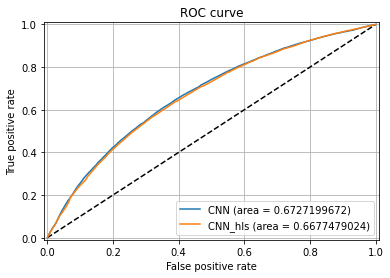

In [45]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.10f})'.format(auc0))
#plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.plot(fpr2, tpr2, label='CNN_hls (area = {:.10f})'.format(auc2))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('qgTaggerPerformance.png')

In [46]:
hls4ml.report.read_vivado_report('keras_cnn/vu13p')

Found 1 solution(s) in keras_cnn/vu13p/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Wed Mar  8 17:00:15 2023

* Version:        2018.3 (Build 2405991 on Thu Dec 06 23:56:15 MST 2018)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcvu13p-flga2577-2L-e


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     4.156|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +-----+-----+-----+-----+----------+
    |  Latency  |  Interval | Pipeline |
    | min | max | min | max |   Type   |
    +-----+-----+-----+-----+----------+
    |  233|  233|  229|  229| dataflow |
    +-----+-----+-----+-----+------